# Model Evaluation
Erin Cameron  
COSC3117  
2022-11-28
---

In [63]:
# Import statements
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics

# 1.0) Load results from testing dataset

In notebook 2, we ran Logistic Regression, Naive Bayes & Random Forest to predict if a flight is cancelled or not. We are loading the results from each algorithms' predicitions here. 

In [7]:
# specify results files & location
results_path = "../results/"
prediction_files = ["RandomForest_Predictions.csv", 
                    "LogisiticRegression_Predictions.csv",
                    "CategoricalNaiveBayes_Predictions.csv"
                   ]
feature_files = ["RandomForest_MDI_FeatureImportance.csv",
                 "LogisiticRegression_FeatureImportance.csv"
                ]

In [20]:
# store results in dictionaries, 1 for predictons and 1 for feature importance (if applicable for method)
predictions = {}
for file in prediction_files:
    pred = pd.read_csv(results_path + file, index_col = 0)
    predictions[pred["Method"].unique()[0]] = pred

features = {}
for file in feature_files:
    feat = pd.read_csv(results_path + file, index_col = 0)
    features[feat["Method"].unique()[0]] = feat

# 2.0) Compare performance across classificaion algorithms

accuracy, recall, precision, ROC, AUC, confusion matrix,plotting

> https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
> good for imbalanced datasets like ours, where we have way more not cancelled flights. average of recall for each class aka the macro-average of recall scores per class  
  
> macro vs. micro average: https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging  

> The Hamming loss is the fraction of labels that are incorrectly predicted: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss

## 2.1) Calculate evaluation metrics




************************************************************
RandomForest
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,77526,175,77701,0.998000,0.002000
1,2029,270,2299,0.117442,0.882558


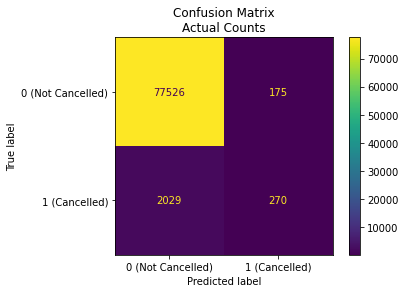

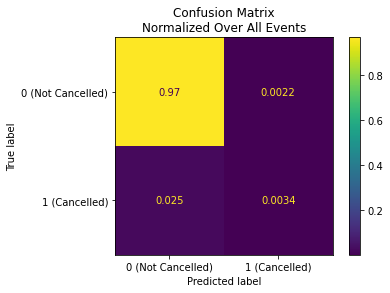


======= Performance metrics ======= 

Balanced Accuracy...0.5576
Hamming Loss...0.02755
Classification report...
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     77701
           1       0.61      0.12      0.20      2299

    accuracy                           0.97     80000
   macro avg       0.79      0.56      0.59     80000
weighted avg       0.96      0.97      0.96     80000




************************************************************
LogisticRegression
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,57141,20560,77701,0.735000,0.265000
1,859,1440,2299,0.626359,0.373641


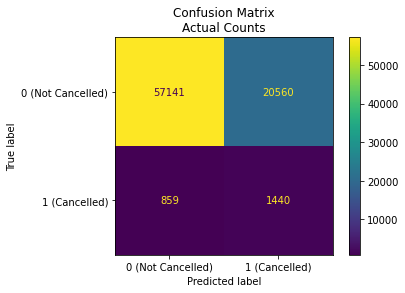

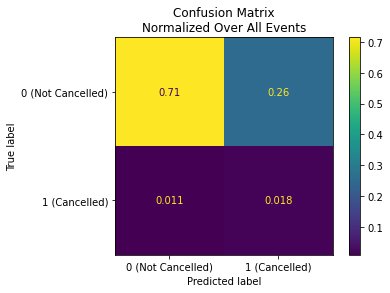


======= Performance metrics ======= 

Balanced Accuracy...0.68088
Hamming Loss...0.26774
Classification report...
              precision    recall  f1-score   support

           0       0.99      0.74      0.84     77701
           1       0.07      0.63      0.12      2299

    accuracy                           0.73     80000
   macro avg       0.53      0.68      0.48     80000
weighted avg       0.96      0.73      0.82     80000




************************************************************
Categorical Naive Bayes
************************************************************
Remember: '0' = not cancelled, '1' = cancelled


======= Confusion Matrix ======= 



Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,77528,173,77701,0.998000,0.002000
1,2173,126,2299,0.054806,0.945194


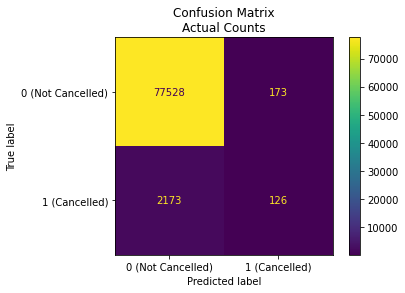

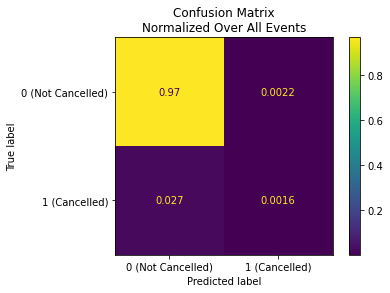


======= Performance metrics ======= 

Balanced Accuracy...0.52629
Hamming Loss...0.02932
Classification report...
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     77701
           1       0.42      0.05      0.10      2299

    accuracy                           0.97     80000
   macro avg       0.70      0.53      0.54     80000
weighted avg       0.96      0.97      0.96     80000



In [132]:
confusion_mats = {}
eval_metrics = {}

for method in predictions:

    print("\n\n")
    print("*" * 60)
    print(method)
    print("*" * 60)
    print("Remember: '0' = not cancelled, '1' = cancelled")
    print("\n")

    actual = predictions[method]["Actual Label"]
    predicted = predictions[method]["Predicited Label"]

    print("======= Confusion Matrix ======= \n")

    cm = pd.crosstab(actual, predicted)
    cm["Num. Events"] = cm[0] + cm[1]
    cm["Prop. Correct"] = round(cm[0]/(cm["Num. Events"]), 3)
    cm["Prop. Incorrect"] = round(cm[1]/(cm["Num. Events"]), 3)
    cm.iloc[1,3] = cm.iloc[1,1] / cm.iloc[1,2] # manual fix
    cm.iloc[1,4] = cm.iloc[1,0] / cm.iloc[1,2]
    confusion_mats[method] = cm
    display(cm)

    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted),
                                                display_labels = ["0 (Not Cancelled)", "1 (Cancelled)"]
                                               )
    cm_display.plot()
    plt.title("Confusion Matrix\nActual Counts")
    plt.show() 

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize = 'all'),
                                                display_labels = ["0 (Not Cancelled)", "1 (Cancelled)"]
                                               )
    cm_display.plot()
    plt.title("Confusion Matrix\nNormalized Over All Events")
    plt.show() 

    print("\n======= Performance metrics ======= \n")
    class_report = metrics.classification_report(actual, predicted, output_dict=True)
    class_report["balanced_accuracy"] = round(metrics.balanced_accuracy_score(actual, predicted), 5)
    class_report["hamming_loss"] = round(metrics.hamming_loss(actual, predicted), 5)
    print("Balanced Accuracy..." + str(class_report["balanced_accuracy"]))
    # plot hamming loss (aka proportion incorrect) within each class
    print("Hamming Loss..." + str(class_report["hamming_loss"]))
    print("Classification report...")
    print(metrics.classification_report(actual, predicted))
    eval_metrics[method] = class_report

## 2.2) Compare evaluation metrics across methods


In [138]:
# plot accuracy within each class across methods
confusion_mats["RandomForest"]

Predicited Label,0,1,Num. Events,Prop. Correct,Prop. Incorrect
Actual Label,,,,,
0,77526,175,77701,0.998000,0.002000
1,2029,270,2299,0.117442,0.882558
